## LLN and CLT

## Overview

This lecture illustrates two of the most important theorems of probability and statistics: The
law of large numbers (LLN) and the central limit theorem (CLT).

These beautiful theorems lie behind many of the most fundamental results in econometrics and quantitative economic modeling.

The lecture is based around simulations that show the LLN and CLT in action.

We also demonstrate how the LLN and CLT break down when the assumptions they are based on do not hold.

In addition, we examine several useful extensions of the classical theorems, such as

* The delta method, for smooth functions of random variables, and
* the multivariate case.

Some of these extensions are presented as exercises.

We'll need the following imports:

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.stats as st

## Relationships


The LLN gives conditions under which sample moments converge to population moments as sample size increases.

The CLT provides information about the rate at which sample moments converge to population moments as sample size increases.

(lln_mr)=
## LLN

```{index} single: Law of Large Numbers
```

We begin with the law of large numbers, which tells us when sample averages
will converge to their population means.

### The LLN in Action

Let's see an example of the LLN in action before we go further.

Consider a [Bernoulli random variable](https://en.wikipedia.org/wiki/Bernoulli_distribution) $X$ with parameter $p$.

This means that $X$ takes values in $\{0,1\}$ and $\mathbb P\{X=1\} = p$.

We can think of drawing $X$ as tossing a biased coin where

* the coin falls on "heads" with probability $p$ and
* we set $X=1$ if the coin is "heads" and zero otherwise.

The mean of $X$ is 

$$
\mathbb E X = 0 \cdot \mathbb P\{X=0\} + 1 \cdot \mathbb P\{X=1\} = \mathbb P\{X=1\} = p
$$

We can generate a draw of $X$ with `scipy.stats` (imported as `st`) as follows:

In [2]:
p = 0.8
X = st.bernoulli.rvs(p)
print(X)

0


In this setting, the LLN tells us if we flip the coin many times, the fraction of heads that we see will be close to $p$.

Let's check this:

In [3]:
n = 1_000_000
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean())  # count the number of 1's and divide by n

0.800251


If we change $p$ the claim still holds:

In [4]:
p = 0.3
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean())

0.299723


Let's connect this to the discussion above, where we said the sample average converges to the "population mean".

The population mean is the mean in an infinite sample, which equals the true mean, or $\mathbb E X$.

The sample mean of the draws $X_1, \ldots, X_n$ is

$$
\bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

which, in this case, is the fraction of draws that equal one (the number of heads divided by $n$).

Thus, the LLN tells us that

```{math}
:label: exp

\bar X_n \to \mathbb E X = p
\qquad (n \to \infty)
```

This is exactly what we illustrated in the code above.

(lln_ksl)=
### Statement of the LLN

Let's state the LLN more carefully.

The traditional version of the law of large numbers concerns independent and identically distributed (IID) random variables.

Let $X_1, \ldots, X_n$ be independent and identically distributed random variables.

This random variables can be continuous or discrete.

For simplicity we will assume they are continuous and we let $f$ denote their density function, so that, for any $i$ in $\{1, \ldots, n\}$


$$ 
    \mathbb P\{a \leq X_i \leq b\} = \int_a^b f(x) dx
$$

(For the discrete case, we need to replace densities with probability mass functions and integrals with sums.)

Let $\mu$ denote the common mean of this sample:

$$
    \mu := \mathbb E X = \int_{-\infty}^{\infty} x f(dx)
$$

In addition, let

$$
\bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

TODO -- use a theorem environment (```{prf:theorem}...```)

The law of large numbers (specifically, Kolmogorov's strong law) states that, if $\mathbb E |X|$ is finite, then

```{math}
:label: lln_as

\mathbb P \left\{ \bar X_n \to \mu \text{ as } n \to \infty \right\} = 1
```

### Comments on the Theorem

What does this last expression mean?

Let's think about it from a simulation perspective, imagining for a moment that
our computer can generate perfect random samples (which of course [it can't](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)).

Let's also imagine that we can generate infinite sequences so that the statement $\bar X_n \to \mu$ can be evaluated.

In this setting, {eq}`lln_as` should be interpreted as meaning that the probability of the computer producing a sequence where $\bar X_n \to \mu$ fails to occur
is zero.

### Illustration

```{index} single: Law of Large Numbers; Illustration
```

Let's now illustrate the LLN using simulation.

When we illustrate it, we will use a key idea: the sample mean $\bar X$ is itself a random variable.

In a sense this is obvious but it can be easy to forget.

The reason $\bar X_n$ is a random variable is that it's a function of the random variables $X_1, \ldots, X_n$.

What we are going to do now is 

1. Pick some distribution to draw each $X_i$ from  
1. Set $n$ to some large number
1. Generate the draws $X_1, \ldots, X_n$
1. Calculate the sample mean $\bar X_n$ and record its value in an array `sample_means`
1. Go to step 3

We will continue the loop over steps 3-4 a total of $m$ times, where $m$ is some large integer.

The array `sample_means` will now contain $m$ draws of the random variable $\bar X_n$.

If we histogram these observations of $\bar X_n$, we should see that they are clustered around the population mean $\mathbb E X$.

Moreover, if we repeat the exercise with a larger value of $n$, we should see that the observations are even more tightly clustered around the population mean.

This is, in essence, what the LLN is telling us.

Let's run some simulations to visualize LLN

Let's

In [11]:
def generate_histogram(X_distribution, n, m):
    fig, ax = plt.subplots(figsize=(10, 6))

    def draw_means(X_distribution, n):

        # Step 3: Generate n draws: X_1, ..., X_n
        X_samples = X_distribution.rvs(size=n)

        # Step 4: Calculate sample mean
        return np.mean(X_samples)
    
    # Step 5: Loop m times
    sample_means = [draw_means(X_distribution, n) for i in range(m)]
    print(f'The mean of sample mean is {round(np.mean(sample_means),2)}')
    
    # Generate a histogram
    ax.hist(sample_means, bins=30, alpha=0.5, density=True)
    mu = X_distribution.mean()
    if not np.isnan(mu):
        ax.axvline(x=mu, ls="--", lw=3, label=fr"$\mu = {mu}$")
        
    ax.set_xlim(min(sample_means), max(sample_means))
    ax.set_xlabel(r'$\bar x$')
    ax.set_ylabel('Density')
    ax.legend()
    plt.show()

The mean of sample mean is 5.0


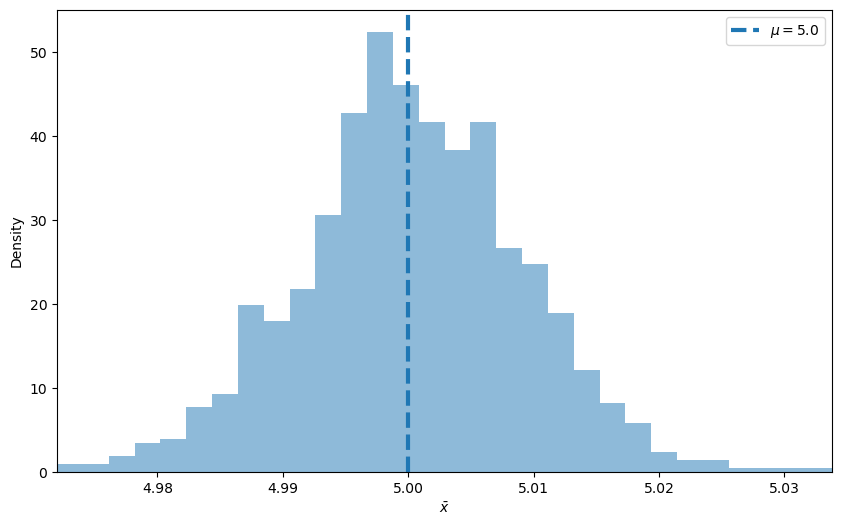

In [14]:
#Step 1: Pick some distribution to draw each $X_i$ from  
#Step 2: Set $n$ to some large number
generate_histogram(st.norm(loc=5, scale=2), n=50_000, m=1000)

We can see that the distribution of $\bar X$ is clustered around $\mathbb E X$ as expected.

We can increase values for `n` and `m` to see how the distribution changes by slightly changing the code to see the changes with an increasing $n$

In [ ]:
def generate_multiple_hist(X_distribution, ns, m, log_scale=False):
    _, ax = plt.subplots(figsize=(10, 6))

    def draw_means(X_distribution, n):
        X_samples = X_distribution.rvs(size=n)
        return np.mean(X_samples)
    
    for n in ns:
        sample_means = [draw_means(X_distribution, n) for i in range(m)]
        if log_scale:
            plt.xscale('symlog')
        ax.hist(sample_means, bins=60, alpha=0.4, density=True, label=fr'$n = {n}$')
        
    mu = X_distribution.mean()
    if not np.isnan(mu):
        ax.axvline(x=mu, ls="--", lw=3, label=fr"$\mu = {mu}$")
        
    ax.set_xlim(min(sample_means), max(sample_means)) 
    ax.set_xlabel(r'$\bar x$')
    ax.set_ylabel('Density')
    ax.set(title=fr'$n = {n}, m = {m}$')
    ax.legend()
    plt.show()

In [ ]:
generate_multiple_hist(st.norm(loc=5, scale=2), ns=[20_000, 50_000, 100_000], m=10_000)

We see that the histogram gradually converge to $\mu$.

You can imagine the result when extrapolating this trend for $(n \to \infty)$.

## Breaking the LLN

We have to pay attention to the assumptions in the statement of the LLN when we apply it.

As indicated by {eq}`lln_as`, LLN can break when $\mathbb E |X|$ is not finite or is not well defined.

We can demonstrate this using a simple simulation using a [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution) for which it does not have a well-defined $\mu$.

We lost the convergence we have seen before with normal distribution 

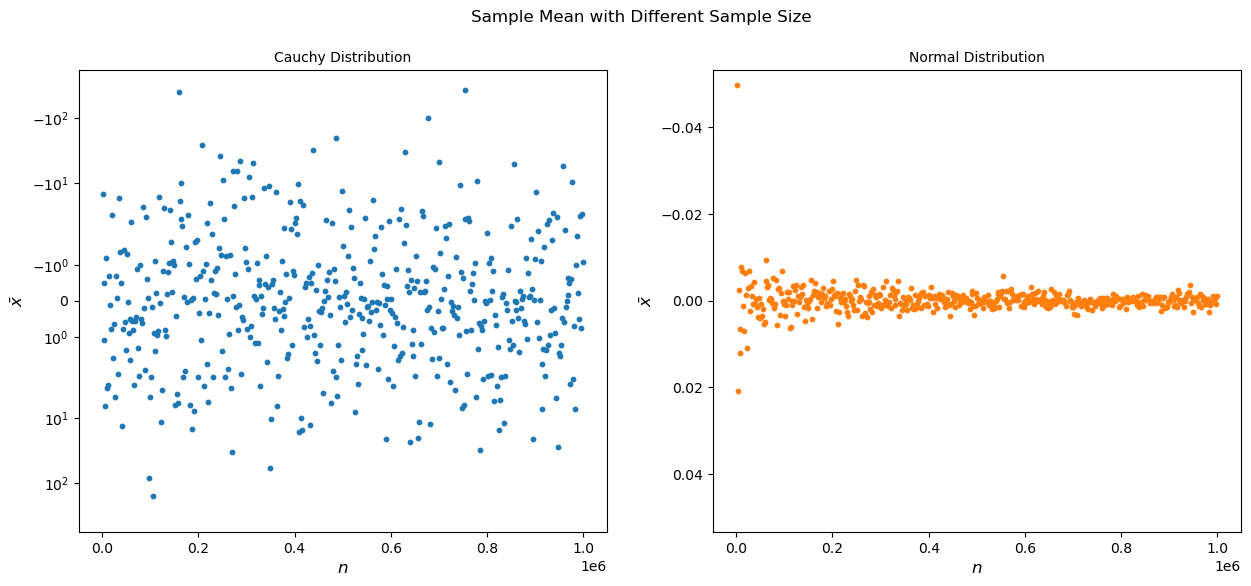

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

def scattered_mean(distribution, burn_in, n, jump, ax, title, color, ylog=False):
    
    #Set a jump to reduce simulation complexity
    sample_means = [np.mean(distribution.rvs(size=i)) 
                    for i in range(burn_in, n+1, jump)]
    
    ax.scatter(range(burn_in, n+1, jump), sample_means, s=10, c=color)
    if ylog:
        ax.set_yscale("symlog")
    ax.set_title(title, size=10)
    ax.set_xlabel(r"$n$", size=12)
    ax.set_ylabel(r"$\bar x$", size=12)
    yabs_max = max(ax.get_ylim(), key=abs)
    ax.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    return ax

scattered_mean(distribution=st.cauchy(), 
                         burn_in=1000, 
                         n=1_000_000, 
                         ax=axes[0],
                         jump=2000,
                         title="Cauchy Distribution",
                         color='#1f77b4',
                         ylog=True)

scattered_mean(distribution=st.norm(), 
                         burn_in=1000, 
                         n=1_000_000,
                         ax=axes[1],
                         jump=2000,
                         title="Normal Distribution",
                         color='#ff7f0e')

fig.suptitle('Sample Mean with Different Sample Size')
plt.show()

We can see that unlike normal distribution, Cauchy distribution does not have a convergence that LLN implies.

It is also not hard to conjecture that LLN can be broken when the IID assumption is violated.

Let's go through a very simple example where LLN fails with IID violated:

Assume

$$
X_1 \sim \mathcal{N}(0,1)
$$

In addition, assume

$$
X_t = X_{t-1} \quad \text{for} \quad t = 2, ..., n
$$

We can then see that 

$$
\bar X_n := \frac{1}{T} \sum_{t=1}^n X_i  = X_1 \sim \mathcal{N}(0,1)
$$

Therefore, the distribution of mean of X follows $\mathcal{N}(0,1)$.

However,

$$
\mathbb E X_t = \mathbb E X_1 = 0
$$

which violates {eq}`exp`, and thus breaks LLN.

```{note}
Although in this case, the violation of IID breaks LLN, it is not always the case for correlated data (TODO: Link to MC Lecture)
```

## LLN and CLT

## Overview

This lecture illustrates two of the most important theorems of probability and statistics: The
law of large numbers (LLN) and the central limit theorem (CLT).

These beautiful theorems lie behind many of the most fundamental results in econometrics and quantitative economic modeling.

The lecture is based around simulations that show the LLN and CLT in action.

We also demonstrate how the LLN and CLT break down when the assumptions they are based on do not hold.

In addition, we examine several useful extensions of the classical theorems, such as

* The delta method, for smooth functions of random variables, and
* the multivariate case.

Some of these extensions are presented as exercises.

We'll need the following imports:

In this case, since the samples are neither drawn independently nor identically distributed, and the converging trend towards $\mu$ is not found.

## CLT

```{index} single: Central Limit Theorem
```

Next, we turn to the central limit theorem, which tells us about the distribution of the deviation between sample averages and population means.

### Statement of the Theorem

The central limit theorem is one of the most remarkable results in all of mathematics.

In the IID setting, it tells us the following:

TODO use a theorem environment (```{prf:theorem...```)

(statement_clt)=
If the sequence $X_1, \ldots, X_n$ is IID, with common mean
$\mu$ and common variance $\sigma^2 \in (0, \infty)$, then

```{math}
:label: lln_clt

\sqrt{n} ( \bar X_n - \mu ) \stackrel { d } {\to} N(0, \sigma^2)
\quad \text{as} \quad
n \to \infty
```

Here $\stackrel { d } {\to} N(0, \sigma^2)$ indicates [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution) to a centered (i.e, zero mean) normal with standard deviation $\sigma$.

### Intuition

```{index} single: Central Limit Theorem; Intuition
```

The striking implication of the CLT is that for **any** distribution with
finite second moment, the simple operation of adding independent
copies **always** leads to a Gaussian curve.

### Simulation 1

Since the CLT seems almost magical, running simulations that verify its implications is one good way to build intuition.

To this end, we now perform the following simulation

1. Choose an arbitrary distribution $F$ for the underlying observations $X_i$.
1. Generate independent draws of $Y_n := \sqrt{n} ( \bar X_n - \mu )$.
1. Use these draws to compute some measure of their distribution --- such as a histogram.
1. Compare the latter to $N(0, \sigma^2)$.

Here's some code that does exactly this for the exponential distribution
$F(x) = 1 - e^{- \lambda x}$.

(Please experiment with other choices of $F$, but remember that, to conform with the conditions of the CLT, the distribution must have a finite second moment.)

(sim_one)=

In [ ]:
# Set parameters
n = 250                  # Choice of n
k = 1_000_000               # Number of draws of Y_n
distribution = st.expon(2)  # Exponential distribution, λ = 1/2
μ, σ = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

(Notice the absence of for loops --- every operation is vectorized, meaning that the major calculations are all shifted to optimized C code.)

The fit to the normal density is already tight and can be further improved by increasing `n`.

## Exercises

## Ex 1

As the reader to rerun the last simulation and experiment with other specifications of $F$ that have finite second moment, making sure that they

Although NumPy doesn't give us a `bernoulli` function, we can generate a draw of $X$ using NumPy via

In [ ]:
U = np.random.rand()
X = 1 if U < p else 0
print(X)

Explain why this provides a random variable $X$ with the right distribution.

Solution:

We can write $X$ as $X = \mathbf 1\{U < p\}$ where $\mathbf 1$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function) (i.e., 1 if the statement is true and zero otherwise).

Here we generated a uniform draw $U$ on $[0,1]$ and then used the fact that

$$
\mathbb P\{0 \leq U < p\} = p - 0 = p
$$

This means that $X = \mathbf 1\{U < p\}$ has the right distribution.

```{solution-end}
```